<a href="https://colab.research.google.com/github/niynp/Data_Mining/blob/main/Tugas1_ModifikasiHyperparameter_DataMining_GroupF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modifikasi Hyperparameter**
----
----
## **`Kelompok F`**

**Anggota Kelompok:**
| No | Nama | NIM |
|-------- |-------- | -------- |
| 1 | Fiqhi Yazid Hasyim | 11220940000067   |
| 2 | Maila Hayati Ependi  | 11230940000004   |
| 3 | Nia Amalia | 11230940000012   |
| 4 | Nabila Khansa Raefa | 11230940000020   |
| 5 | Sekar afifa cettastami | 11230940000062   |


## **Import Data**

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [47]:
%%capture
!wget -O diabetes.csv https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

In [48]:
db = pd.read_csv("diabetes.csv")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
#split dataset in features and target variable

x = db.iloc[:, :8] # Features
y = db.iloc[:, 8] # Target variable

In [51]:
print(x, y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [52]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44) # 80% training and 20% test

In [53]:
#Mengenal hyperparameter dari Decision Tree
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

## **Tugas Kelompok**

### 1. Lakukan beberapa modifikasi hyperparameter model ini atau pengurangan feature tertentu (minimal 10 modifikasi)

In [54]:
results = []

In [55]:
# Create Decision Tree classifer object
clf_1 = DecisionTreeClassifier(min_samples_leaf=10, random_state=44)

# Train Decision Tree Classifer
clf_1.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_1 = clf_1.predict(X_train)
train_acc_1 = round(metrics.accuracy_score(y_train, y_pred_train_1) * 100)
print("### Skenario 1: min_samples_leaf=10")
print("Akurasi data training:", train_acc_1, "%")

# Membandingkan Akurasi di data testing
y_pred_test_1 = clf_1.predict(X_test)
test_acc_1 = round(metrics.accuracy_score(y_test, y_pred_test_1) * 100)
print("Akurasi data testing:", test_acc_1, "%")
results.append(["Skenario 1: min_samples_leaf=10", train_acc_1, test_acc_1])

### Skenario 1: min_samples_leaf=10
Akurasi data training: 85 %
Akurasi data testing: 80 %


In [56]:
# Create Decision Tree classifer object
clf_2 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=44)

# Train Decision Tree Classifer
clf_2.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_2 = clf_2.predict(X_train)
train_acc_2 = round(metrics.accuracy_score(y_train, y_pred_train_2) * 100)
print("### Skenario 2: max_leaf_nodes=10")
print("Akurasi data training:", train_acc_2, "%")

# Membandingkan Akurasi di data testing
y_pred_test_2 = clf_2.predict(X_test)
test_acc_2 = round(metrics.accuracy_score(y_test, y_pred_test_2) * 100)
print("Akurasi data testing:", test_acc_2, "%")
results.append(["Skenario 2: max_leaf_nodes=10", train_acc_2, test_acc_2])

### Skenario 2: max_leaf_nodes=10
Akurasi data training: 81 %
Akurasi data testing: 78 %


In [57]:
# Create Decision Tree classifer object
clf_3 = DecisionTreeClassifier(ccp_alpha=0.005, random_state=44)

# Train Decision Tree Classifer
clf_3.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_3 = clf_3.predict(X_train)
train_acc_3 = round(metrics.accuracy_score(y_train, y_pred_train_3) * 100)
print("### Skenario 3: CCP Alpha = 0.005 (Pruning Kuat)")
print("Akurasi data training:", train_acc_3, "%")

# Membandingkan Akurasi di data testing
y_pred_test_3 = clf_3.predict(X_test)
test_acc_3 = round(metrics.accuracy_score(y_test, y_pred_test_3) * 100)
print("Akurasi data testing:", test_acc_3, "%")
results.append(["Skenario 3: CCP Alpha = 0.005", train_acc_3, test_acc_3])

### Skenario 3: CCP Alpha = 0.005 (Pruning Kuat)
Akurasi data training: 83 %
Akurasi data testing: 81 %


In [58]:
# Create Decision Tree classifer object
clf_4 = DecisionTreeClassifier(min_samples_split=5, random_state=44)

# Train Decision Tree Classifer
clf_4.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_4 = clf_4.predict(X_train)
train_acc_4 = round(metrics.accuracy_score(y_train, y_pred_train_4) * 100)
print("### Skenario 4: Min split 5")
print("Akurasi data training:", train_acc_4, "%")

# Membandingkan Akurasi di data testing
y_pred_test_4 = clf_4.predict(X_test)
test_acc_4 = round(metrics.accuracy_score(y_test, y_pred_test_4) * 100)
print("Akurasi data testing:", test_acc_4, "%")
results.append(["Skenario 4: Min split 5", train_acc_4, test_acc_4])

### Skenario 4: Min split 5
Akurasi data training: 97 %
Akurasi data testing: 79 %


In [59]:
# Create Decision Tree classifer object
clf_5 = DecisionTreeClassifier(max_depth=2, min_weight_fraction_leaf=0.01, random_state=44)

# Train Decision Tree Classifer
clf_5.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_5 = clf_5.predict(X_train)
train_acc_5 = round(metrics.accuracy_score(y_train, y_pred_train_5) * 100)
print("### Skenario 5: min_weight_fraction_leaf=0.01")
print("Akurasi data training:", train_acc_5, "%")

# Membandingkan Akurasi di data testing
y_pred_test_5 = clf_5.predict(X_test)
test_acc_5 = round(metrics.accuracy_score(y_test, y_pred_test_5) * 100)
print("Akurasi data testing:", test_acc_5, "%")
results.append(["Skenario 5: min_weight_fraction_leaf=0.01", train_acc_5, test_acc_5])

### Skenario 5: min_weight_fraction_leaf=0.01
Akurasi data training: 77 %
Akurasi data testing: 78 %


In [60]:
# Create Decision Tree classifier object
# min_samples_leaf=10 (membutuhkan 10 sampel di setiap node daun)
clf_6 = DecisionTreeClassifier(min_samples_leaf=10, random_state=44)

# Train Decision Tree Classifier
clf_6.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_6 = clf_6.predict(X_train)
train_acc_6 = round(metrics.accuracy_score(y_train, y_pred_train_6) * 100)
print("### Skenario 6: Min Samples Leaf = 10")
print("Akurasi data training:", train_acc_6, "%")

# Membandingkan Akurasi di data testing
y_pred_test_6 = clf_6.predict(X_test)
test_acc_6 = round(metrics.accuracy_score(y_test, y_pred_test_6) * 100)
print("Akurasi data testing:", test_acc_6, "%")
results.append(["Skenario 6: Min Samples Leaf = 10", train_acc_6, test_acc_6])

### Skenario 6: Min Samples Leaf = 10
Akurasi data training: 85 %
Akurasi data testing: 80 %


In [61]:
# Create Decision Tree classifer object
clf_7 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=44)

# Train Decision Tree Classifer
clf_7.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_7 = clf_7.predict(X_train)
train_acc_7 = round(metrics.accuracy_score(y_train, y_pred_train_7) * 100)
print("### Skenario 7: Depth 4 & Min Leaf 5")
print("Akurasi data training:", train_acc_7, "%")

# Membandingkan Akurasi di data testing
y_pred_test_7 = clf_7.predict(X_test)
test_acc_7 = round(metrics.accuracy_score(y_test, y_pred_test_7) * 100)
print("Akurasi data testing:", test_acc_7, "%")
results.append(["Skenario 7: Depth 4 & Min Leaf 5", train_acc_7, test_acc_7])

### Skenario 7: Depth 4 & Min Leaf 5
Akurasi data training: 79 %
Akurasi data testing: 77 %


In [62]:
# Buat subset data tanpa fitur 'Insulin'
X_train_sub = X_train.drop(['Insulin'], axis=1)
X_test_sub = X_test.drop(['Insulin'], axis=1)

# Create Decision Tree classifier object
clf_8 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=44)

# Train Decision Tree Classifier menggunakan subset data
clf_8.fit(X_train_sub, y_train)

# Membandingkan Akurasi di data training
y_pred_train_8 = clf_8.predict(X_train_sub)
train_acc_8 = round(metrics.accuracy_score(y_train, y_pred_train_8) * 100)
print("### Skenario 8: Tanpa Insulin dengan Max Depth 5")
print("Akurasi data training:", train_acc_8, "%")

# Membandingkan Akurasi di data testing
y_pred_test_8 = clf_8.predict(X_test_sub)
test_acc_8 = round(metrics.accuracy_score(y_test, y_pred_test_8) * 100)
print("Akurasi data testing:", test_acc_8, "%")
print("--------------------------------------------------")
results.append(["Skenario 8: Tanpa Insulin dengan Max Depth 5", train_acc_8, test_acc_8])

### Skenario 8: Tanpa Insulin dengan Max Depth 5
Akurasi data training: 81 %
Akurasi data testing: 82 %
--------------------------------------------------


In [63]:
# Create Decision Tree classifer object
clf_9 = DecisionTreeClassifier(max_depth=2, max_features=2, random_state=44)

# Train Decision Tree Classifer
clf_9.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_9 = clf_9.predict(X_train)
train_acc_9 = round(metrics.accuracy_score(y_train, y_pred_train_9) * 100)
print("### Skenario 9: Depth 3 & Max Features 5")
print("Akurasi data training:", train_acc_9, "%")

# Membandingkan Akurasi di data testing
y_pred_test_9 = clf_9.predict(X_test)
test_acc_9 = round(metrics.accuracy_score(y_test, y_pred_test_9) * 100)
print("Akurasi data testing:", test_acc_9, "%")
results.append(["Skenario 9: Depth 3 & Max Features 5", train_acc_9, test_acc_9])

### Skenario 9: Depth 3 & Max Features 5
Akurasi data training: 77 %
Akurasi data testing: 78 %


In [64]:
# Create Decision Tree classifer object
clf_10 = DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=44)

# Train Decision Tree Classifer
clf_10.fit(X_train, y_train)

# Membandingkan Akurasi di data training
y_pred_train_10 = clf_10.predict(X_train)
train_acc_10 = round(metrics.accuracy_score(y_train, y_pred_train_10) * 100)
print("### Skenario 10: Min Impurity Decrease = 0.01")
print("Akurasi data training:", train_acc_10, "%")

# Membandingkan Akurasi di data testing
y_pred_test_10 = clf_10.predict(X_test)
test_acc_10 = round(metrics.accuracy_score(y_test, y_pred_test_10) * 100)
print("Akurasi data testing:", test_acc_10, "%")
results.append(["Skenario 10: Min Impurity Decrease = 0.01", train_acc_10, test_acc_10])

### Skenario 10: Min Impurity Decrease = 0.01
Akurasi data training: 77 %
Akurasi data testing: 78 %


In [65]:
results

[['Skenario 1: min_samples_leaf=10', 85, 80],
 ['Skenario 2: max_leaf_nodes=10', 81, 78],
 ['Skenario 3: CCP Alpha = 0.005', 83, 81],
 ['Skenario 4: Min split 5', 97, 79],
 ['Skenario 5: min_weight_fraction_leaf=0.01', 77, 78],
 ['Skenario 6: Min Samples Leaf = 10', 85, 80],
 ['Skenario 7: Depth 4 & Min Leaf 5', 79, 77],
 ['Skenario 8: Tanpa Insulin dengan Max Depth 5', 81, 82],
 ['Skenario 9: Depth 3 & Max Features 5', 77, 78],
 ['Skenario 10: Min Impurity Decrease = 0.01', 77, 78]]

### 2. Buat tabel perbandingan tiap modifikasi tersebut dengan akurasi data training dan testingnya


In [66]:
# Buat tabel hasil
hasil = pd.DataFrame(results, columns=["Model Name", "Train Accuracy", "Test Accuracy"])

print("\n=== TABEL PERBANDINGAN AKURASI ===")
display(hasil.style.background_gradient(cmap="YlGnBu"))

# Urutkan dari test accuracy tertinggi
hasil_sorted = hasil.sort_values(by="Test Accuracy", ascending=False)
print("\n=== MODEL DENGAN AKURASI TERBAIK ===")
display(hasil_sorted.reset_index(drop=True))

# CETAK MODEL TERBAIK
best = hasil.loc[hasil["Test Accuracy"].idxmax()]
print(f"\n Model terbaik: {best['Model Name']}")
print(f"   Akurasi Training: {best['Train Accuracy']}% ")
print(f"   Akurasi Testing : {best['Test Accuracy']}% ")


=== TABEL PERBANDINGAN AKURASI ===


,Model Name,Train Accuracy,Test Accuracy
0,Skenario 1: min_samples_leaf=10,85,80
1,Skenario 2: max_leaf_nodes=10,81,78
2,Skenario 3: CCP Alpha = 0.005,83,81
3,Skenario 4: Min split 5,97,79
4,Skenario 5: min_weight_fraction_leaf=0.01,77,78
5,Skenario 6: Min Samples Leaf = 10,85,80
6,Skenario 7: Depth 4 & Min Leaf 5,79,77
7,Skenario 8: Tanpa Insulin dengan Max Depth 5,81,82
8,Skenario 9: Depth 3 & Max Features 5,77,78
9,Skenario 10: Min Impurity Decrease = 0.01,77,78



=== MODEL DENGAN AKURASI TERBAIK ===


,Model Name,Train Accuracy,Test Accuracy
0,Skenario 8: Tanpa Insulin dengan Max Depth 5,81,82
1,Skenario 3: CCP Alpha = 0.005,83,81
2,Skenario 6: Min Samples Leaf = 10,85,80
3,Skenario 1: min_samples_leaf=10,85,80
4,Skenario 4: Min split 5,97,79
5,Skenario 2: max_leaf_nodes=10,81,78
6,Skenario 5: min_weight_fraction_leaf=0.01,77,78
7,Skenario 9: Depth 3 & Max Features 5,77,78
8,Skenario 10: Min Impurity Decrease = 0.01,77,78
9,Skenario 7: Depth 4 & Min Leaf 5,79,77



 Model terbaik: Skenario 8: Tanpa Insulin dengan Max Depth 5
   Akurasi Training: 81% 
   Akurasi Testing : 82% 


### 3. Kesimpulan

Berdasarkan 10 modifikasi hyperparameter yang kami lakukan, diperoleh bahwa **Skenario 8 merupakan model dengan performa terbaik**. Pada skenario ini, model dilatih dengan batas kedalaman pohon (max depth = 5) serta tanpa menggunakan fitur Insulin karena kami menganggap kurang berpengaruh terhadap model. Hasilnya menunjukkan **akurasi training sebesar 81% dan akurasi testing sebesar 82%**, dengan selisih yang sangat kecil antara keduanya. Hal ini menandakan bahwa model memiliki kemampuan generalisasi yang baik atau bisa disebut good fitting karena tidak mengalami overfitting maupun underfitting.

Terdapat pula **model yang overvitting, yaitu ada pada Skenario 4**. Model ini memiliki **akurasi training mencapai 97% sementara akurasi testing hanya 79%** yang menunjukkan menunjukkan selisih yang cukup besar (18%). Hal ini menandakan bahwa model terlalu kompleks dan belajar terlalu detail pada data latih, sehingga kehilangan kemampuan untuk melakukan generalisasi terhadap data baru.

Berdasarkan perbandingan ini dapat disimpulkan bahwa **penghapusan fitur Insulin justru meningkatkan akurasi model**, yang berarti kedua fitur tersebut tidak memberikan kontribusi signifikan atau bahkan menambah noise terhadap hasil klasifikasi. Dengan demikian, **fitur yang paling berpengaruh dalam membentuk model yang stabil dan akurat diduga adalah Glucose, SkinThickness, BMI, Age, BloodPressure, Pregnancies, serta DiabetesPedigreeFunction**, karena ketika hanya fitur-fitur inilah yang digunakan, performa model mencapai hasil terbaik.

### 4. Dari skenario 8, buat visualisasi Decision Tree dan Importance Feature-nya

**a. Visualisasi Decision Tree**

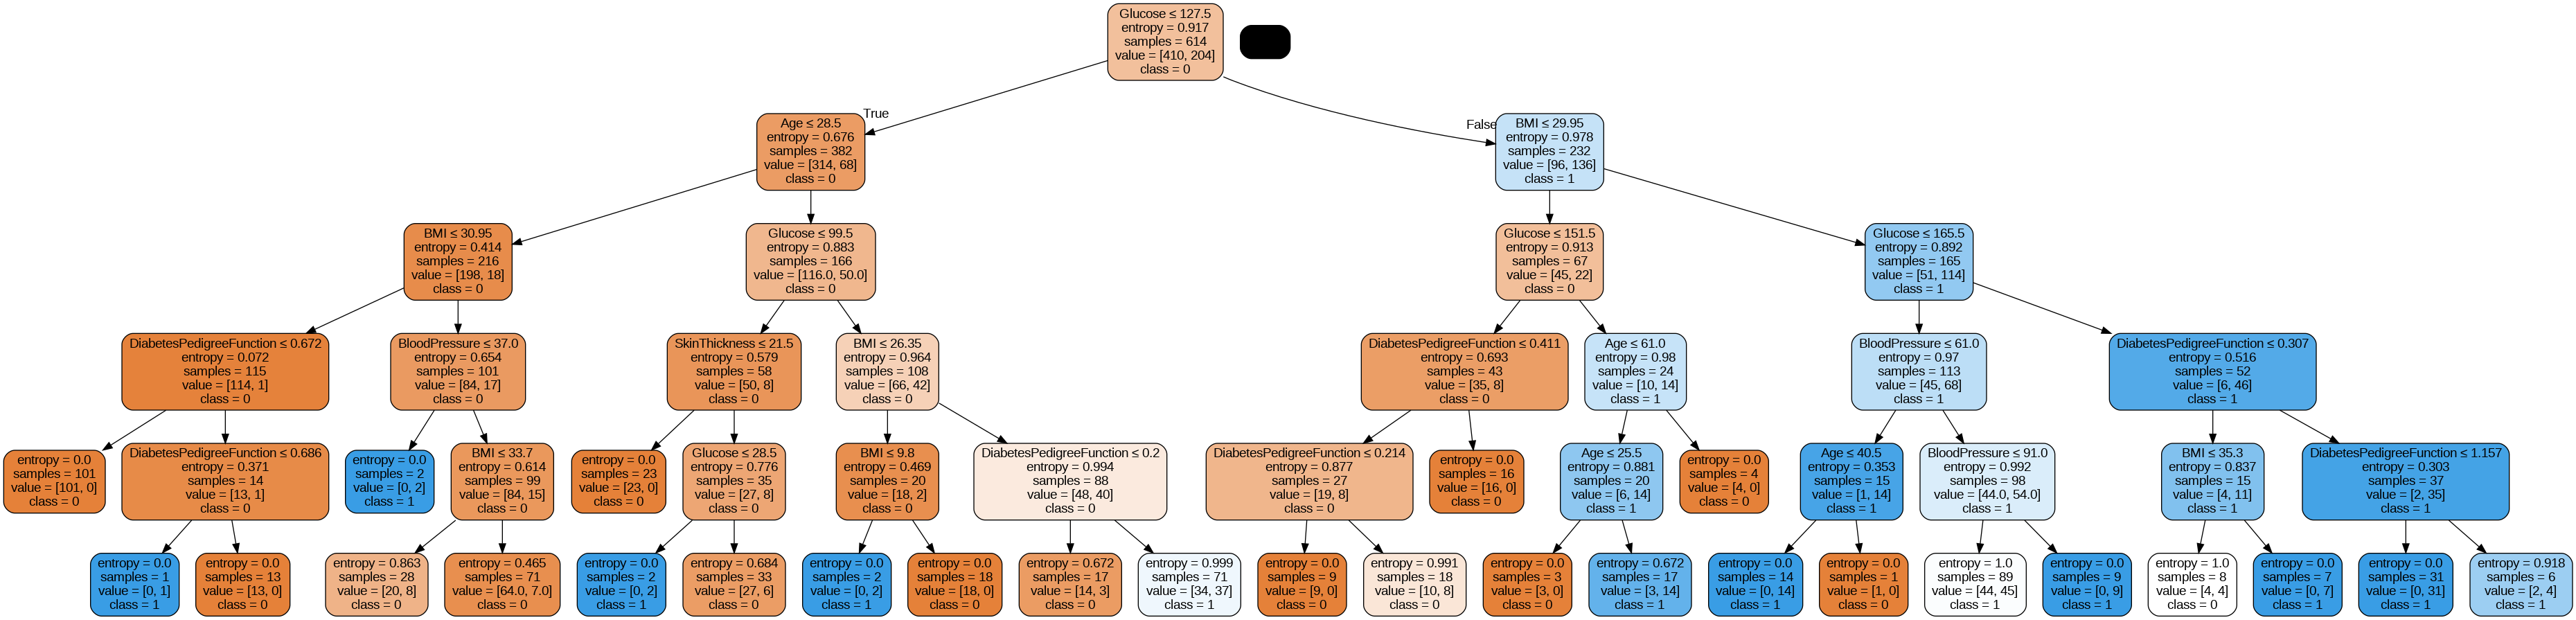

In [67]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO

# Karena SkinThickness & Insulin sudah di drop maka fitur yang digunakan hanya 6
feature_cols_sub = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'BMI', 'DiabetesPedigreeFunction', 'Age']

# Buat pohon keputusan
dot_data = StringIO()
export_graphviz(
    clf_8,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols_sub,
    class_names=['0', '1']
)

# Tampilkan pohon
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_skenario8.png')
Image(graph.create_png())


**b. Importance feature**

Feature: Pregnancies, Score: 0.00%
Feature: Glucose, Score: 40.88%
Feature: BloodPressure, Score: 7.65%
Feature: SkinThickness, Score: 2.39%
Feature: BMI, Score: 21.71%
Feature: DiabetesPedigreeFunction, Score: 12.68%
Feature: Age, Score: 14.70%


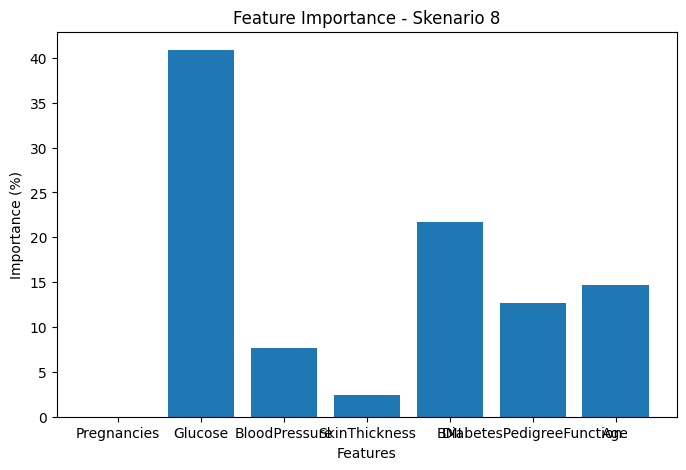

In [68]:
# Feature importance untuk skenario 8
feature_cols_sub = X_train_sub.columns
importance_Skenario_8 = clf_8.feature_importances_

for i, v in enumerate(importance_Skenario_8):
    print(f'Feature: {feature_cols_sub[i]}, Score: {v*100:.2f}%')

# Plot feature importance
plt.figure(figsize=(8,5))
plt.bar(feature_cols_sub, importance_Skenario_8*100)
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importance - Skenario 8')
plt.show()


Dari hasil analisis feature importance pada skenario ini, **fitur Glucose memiliki pengaruh paling besar** terhadap prediksi model (40,88%), diikuti oleh BMI (21,71%) dan Age (14,70%) yang juga memberikan kontribusi signifikan. DiabetesPedigreeFunction memberikan pengaruh sedang sebesar 12,68%, sedangkan BloodPressure (7,65%) dan SkinThickness (2,39%) memiliki pengaruh yang lebih kecil. Sementara itu, **Pregnancies tidak berpengaruh sama sekali (0,00%)**. Temuan ini menunjukkan bahwa **kadar gula darah, indeks massa tubuh, dan usia merupakan faktor utama** dalam prediksi diabetes, sedangkan faktor lainnya berkontribusi lebih kecil.

## Bonus

### Modifikasi Hyperparameter dengan Membuang Fitur Insulin, Pregnancies, BloodPressure, SkinThickness Sesuai Saran Pada Importance Feature

In [69]:
# Buat subset data tanpa fitur 'Insulin', 'Pregnancies', 'BloodPressure', 'SkinThickness'
X_train_sub = X_train.drop(['Insulin', 'Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)
X_test_sub = X_test.drop(['Insulin', 'Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

# Create Decision Tree classifier object
clf_saran = DecisionTreeClassifier(max_depth=5, random_state=44
)

# Train Decision Tree Classifier menggunakan subset data
clf_saran.fit(X_train_sub, y_train)

# Membandingkan Akurasi di data training
y_pred_train_saran = clf_saran.predict(X_train_sub)
train_acc_saran = round(metrics.accuracy_score(y_train, y_pred_train_saran) * 100)
print("Skenario Saran: Tanpa Insulin, Pregnancies, BloodPressure, SkinThickness dengan Max Depth 5")
print("Akurasi data training:", train_acc_saran, "%")

# Membandingkan Akurasi di data testing
y_pred_test_saran = clf_saran.predict(X_test_sub)
test_acc_saran = round(metrics.accuracy_score(y_test, y_pred_test_saran) * 100)
print("Akurasi data testing:", test_acc_saran, "%")
print("--------------------------------------------------")
results.append(["Skenario Saran: Tanpa Insulin, Pregnancies, BloodPressure, SkinThickness dengan Max Depth 5", train_acc_saran, test_acc_saran])

Skenario Saran: Tanpa Insulin, Pregnancies, BloodPressure, SkinThickness dengan Max Depth 5
Akurasi data training: 82 %
Akurasi data testing: 82 %
--------------------------------------------------
